# Data Analysis Covid-19
**Covid-19** adalah pandemi yang sudah mewabah ke seluruh dunia. Sebagian besar negara-negara di dunia sudah terjangkit. Penanganan tiap-tiap negara pun berbeda, sesuai dengan kebijakan pemerintah. Hal ini mengakibatkan perbedaan trend kenaikan atau penurunan kasus covid berbeda-beda tiap negara.

Pada kesempatan kali ini, kita akan membahas salah satu project dari DQLab mengenai **Analisis Data Covid-19 di Dunia dan ASEAN**.
Dataset yang digunakan adalah data covid-19 dari salah satu open API yang tersedia yaitu https://covid19-api.org/.

# Import Library
Library yang akan digunakan dalam kasus ini, yaitu
* *requests* untuk menunjuk API url yang akan diakses
* *json* untuk mengambil data dengan extensi json
* *numpy* untuk perhitungan numerik
* *pandas* untuk membuat dataframe dan manipulasi data
* *matplotlib* untuk memvisualisasi data dengan grafik



In [63]:
# Import library yang digunakan
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Mengakses Data


## Membuat Fungsi get API
Tahap pertama adalah membuat fungsi python untuk mengambil data json pada url yang ditunjuk/dipilih. Dimana data sukses diambil dengan **status code 200**. Jika tidak artinya data gagal untuk diambil.

In [64]:
# Fungsi untuk mengambil data dari API
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

## Memanggil API Covid19
Tahap kedua adalah mengambil data covid-19. Rekapitulasi data COVID-19 global berada di https://covid19-api.org/. Lalu kita akan mengambil data covid19 di seluruh negara pada tanggal tertentu. Untuk kasus ini, record data yang diambil adalah **'2020-09-12'**, kemudian masukkan hasil respon api ke dalam variabel.

Untuk mendapatkan dataframe covid-19, kita gunakan fungsi bawaan dari pandas yaitu **pd.io.json.json_normalize** dan panggil *function* yang sudah dibuat sebelumnya, yaitu **get_json()**. Lalu kita bisa menampilkan beberapa data awal sebagai sampel.

In [65]:
# Mengambil record data covid-19 pada tanggal tertentu
record_date = '2020-09-12'
covid_url = 'https://covid19-api.org/api/status?date='+record_date

# Membuat dataframe covid-19
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))
df_covid_worldwide.head()

,country,last_update,cases,deaths,recovered
0,US,2020-09-11T23:32:03,6440541,192886,2417878
1,IN,2020-09-11T23:32:03,4562414,76271,3542663
2,BR,2020-09-11T23:32:03,4238446,129522,3683047
3,RU,2020-09-11T23:32:03,1048257,18309,865646
4,PE,2020-09-11T23:32:03,710067,30344,544745


## Merubah Format date
Terlihat data kolom **last_update** belum menggunakan format yang sesuai. Untuk itu kita akan ubah menjadi format nya menggunakan fungsi **pd.to_datetime** dengan format **YYYY-mm-dd HH:MM:SS**. Kemudian ubah bentuk *datetime* untuk mengambil *date only* dengan fungsi date() setiap baris nya.

In [66]:
# Merubah format data tanggal
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], 
                                                   format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

In [67]:
# Tampilan data setelah diformat
df_covid_worldwide.head()

,country,last_update,cases,deaths,recovered
0,US,2020-09-11,6440541,192886,2417878
1,IN,2020-09-11,4562414,76271,3542663
2,BR,2020-09-11,4238446,129522,3683047
3,RU,2020-09-11,1048257,18309,865646
4,PE,2020-09-11,710067,30344,544745


## Mengambil Data Countries
Tahap berikutnya adalah mengambil data countries. Data tersebut berasal dari url https://covid19-api.org/api/countries. Lalu kita akan ambil hanya kolom **nama negara dan kode negara** saja untuk dijadikan dataframe.

In [68]:
# Mengambil data countries dari API
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))

# Ambil kolom yang digunakan
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

df_countries.head()

,name,country
0,Afghanistan,AF
1,Albania,AL
2,Algeria,DZ
3,Andorra,AD
4,Angola,AO


# Analisis COVID-19 di Dunia

## Merge Covid19 Data dan Countries
Pertama kita akan gabungkan 2 *dataframe* yang telah dibuat sebelumnya yaitu **df_covid_worldwide** dan **df_countries** menggunakan fungsi **merge** berdasarkan kode negara atau kolom **country**. Lalu tampilkan 5 data teratas hasil *merge dataframe*.

In [69]:
# Merge dataframe
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

# Menampilkan 5 data teratas
df_covid_denormalized.head()

,country,last_update,cases,deaths,recovered,name
0,US,2020-09-11,6440541,192886,2417878,United States of America
1,IN,2020-09-11,4562414,76271,3542663,India
2,BR,2020-09-11,4238446,129522,3683047,Brazil
3,RU,2020-09-11,1048257,18309,865646,Russian Federation
4,PE,2020-09-11,710067,30344,544745,Peru


Terlihat negara **United States of Amerika** memiliki kasus covid-19 terbanyak yaitu 6.440.541 kasus pada update terkini.

## Menghitung Fatality Ratio
Selanjutnya kita akan mencari rasio tingkat kematian dari total kasus yang terjadi pada tiap negara. Caranya adalah menambahkan kolom baru bernama **fatality_ratio**, yang merupakan pembagian antara kolom **deaths** dan **cases**.

In [70]:
# Mencari fatality ratio tiap negara
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

df_covid_denormalized.head()

,country,last_update,cases,deaths,recovered,name,fatality_ratio
0,US,2020-09-11,6440541,192886,2417878,United States of America,0.029949
1,IN,2020-09-11,4562414,76271,3542663,India,0.016717
2,BR,2020-09-11,4238446,129522,3683047,Brazil,0.030559
3,RU,2020-09-11,1048257,18309,865646,Russian Federation,0.017466
4,PE,2020-09-11,710067,30344,544745,Peru,0.042734


## Top 20 Negara dengan Fatality Ratio Tertinggi
Kita akan ambil **20 negara teratas** dengan kolom fatality_ratio tertinggi dengan mengurutkan data secara descending menggunakan fungsi **sort_values**.

In [71]:
# Menampilkan 20 Negara dengan fatality ratio tertinggi
df_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False)

df_top_20_fatality_rate = df_fatality_rate.head(20)
df_top_20_fatality_rate

,country,last_update,cases,deaths,recovered,name,fatality_ratio
143,YE,2020-09-11,2007,582,1211,Yemen,0.289985
18,IT,2020-09-11,284796,35597,212432,Italy,0.124991
13,GB,2020-09-11,364085,41703,1848,United Kingdom of Great Britain and Northern I...,0.114542
35,BE,2020-09-11,90568,9917,18659,Belgium,0.109498
6,MX,2020-09-11,652364,69649,541804,Mexico,0.106764
191,EH,2020-09-11,10,1,8,Western Sahara,0.100000
28,EC,2020-09-11,113206,10749,91242,Ecuador,0.094951
11,FR,2020-09-11,401794,30899,89823,France,0.076903
39,NL,2020-09-11,83369,6290,1846,Netherlands,0.075448
157,TD,2020-09-11,1081,79,934,Chad,0.073080


## Visualisasi Top 20 Negara dengan Fatality Rate Tertinggi
Untuk memvisualisasikan negara-negara dengan kasus fatality rate tertinggi akibat covid-19 ini dapat dilakukan dengan menggunakan bar chart. Dimana sumbu x adalah kolom **name** (nama negara), dan sumbu y adalah kolom **fatality_ratio**, lalu gunakan fungsi plt.barh(x, y) dari library matplotlib agar nama negara terlihat jelas.

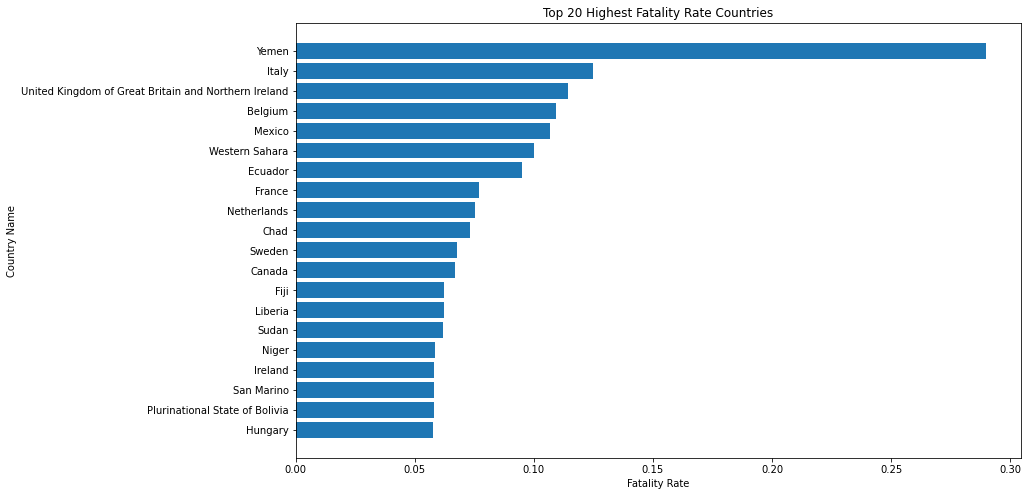

In [72]:
# Membuat grafik Top 20 Negara
plt.figure(figsize=(13, 8))

top_20 = df_top_20_fatality_rate.sort_values(by='fatality_ratio')
x = top_20['name']
y = top_20['fatality_ratio']
plt.barh(x,y)

# Labeling axis
plt.xlabel('Fatality Rate')
plt.ylabel('Country Name')
plt.title('Top 20 Highest Fatality Rate Countries')
# plt.xticks(rotation=90)
# plt.tight_layout()

plt.show()

Dari grafik tersebut dapat disimpulkan **Negara Yemen** memiliki fatality ratio tertinggi yaitu **0.289985**, walaupun memiliki total kasus lebih sedikit dibandingkan Italy di peringkat kedua.

# Analisis COVID-19 di ASEAN

## Menggabungkan Dataframe
Kali ini kita akan membandingkan kasus covid-19 di negara ASEAN, yaitu Indonesia, Thailand, Singapore, Malaysia, Philippines, Vietnam, Brunei, Myanmar (Burma), Cambodia, Laos. Berikut adalah kode negara ASEAN yang akan kita masukkan sebagai list.

- ID -> Indonesia
- TH -> Thailand
- SG -> Singapore
- MY -> Malaysia
- PH -> Philippines
- VN -> Vietnam
- BN -> Brunei
- MM -> Myanmar
- KH -> Cambodia
- LA -> Laos

Untuk itu, API country akan dipanggil berkali-kali sebanyak negara yang ada di list tersebut menggunakan perulanagan/looping. Tahapan mengambil data API masih sama seperti di awal.

In [73]:
# Membuat list kode negara ASEAN
countries = ['ID','TH','SG','MY','PH','VN','BN','MM','KH','LA']

# Looping untk mengambil data covid-19 tiap negara
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
	df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i==0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
	i=i+1

df_covid_timeline_merged.head()

,country,last_update,cases,deaths,recovered
0,LA,2020-09-12,23,0,21
1,LA,2020-09-11,23,0,21
2,LA,2020-09-10,22,0,21
3,LA,2020-09-09,22,0,21
4,LA,2020-09-08,22,0,21


## Merge Data Covid19 Dengan Data Country
Tahap berikutnya adalah menggabungkan 2 dataframe yaitu **df_covid_timeline_merged** dengan **df_countries** dengan kolom country (kode negara) sebagai pivot.

In [74]:
# Merge Data Covid-19 dan Country
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

df_covid_timeline_denormalized.head()

,country,last_update,cases,deaths,recovered,name
0,LA,2020-09-12,23,0,21,Lao People's Democratic Republic
1,LA,2020-09-11,23,0,21,Lao People's Democratic Republic
2,LA,2020-09-10,22,0,21,Lao People's Democratic Republic
3,LA,2020-09-09,22,0,21,Lao People's Democratic Republic
4,LA,2020-09-08,22,0,21,Lao People's Democratic Republic


## Pertumbuhan Kasus Covid-19 di ASEAN
Untuk melihat pertumbuhan kasus covid-19, kita akan memfilter kolom last_update dari data covid-19 sehingga hanya data dari **tanggal 1 Maret 2020** ke atas yang diambil menggunakan fungsi **datetime.date** dari library datetime dengan format (YYYY, mm, dd).

In [75]:
import datetime

# Filter pertumbuhan covid-19 pada tanggal tertentu
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]


## Visualisasi Kasus Covid-19 di ASEAN
Untuk menggambarkan pertumbuhan kasus covid-19, kita akan gunakan line chart. Dimana sumbu x adalah tanggal (**last_update**) pada tiap-tiap negara dan y adalah jumlah kasus (**cases**) pada tiap-tiap negara.

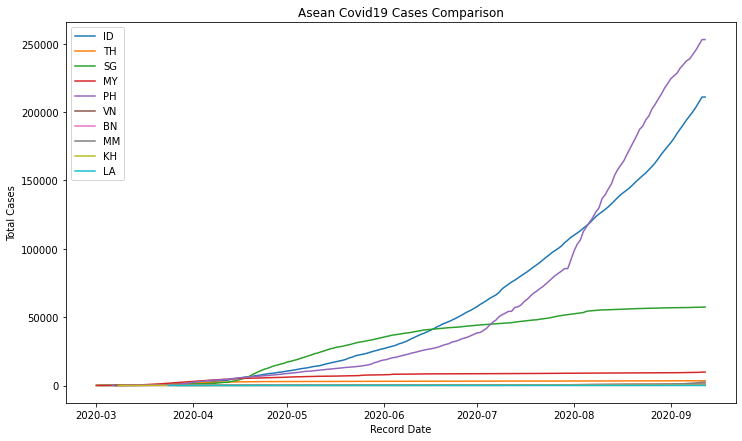

In [76]:
# List negara ASEAN
countries = ['ID','TH','SG','MY','PH','VN','BN','MM','KH','LA']

# Membuat perulangan line chart tiap negara

plt.figure(figsize=(12,7))
for country in countries:
	country_data = df_covid_timeline_denormalized['country']==country
	x = df_covid_timeline_denormalized[country_data]['last_update']
	y = df_covid_timeline_denormalized[country_data]['cases']
	plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')

plt.show()

Dari grafik di atas dapat disimpulkan **Negara Philippines** memiliki jumlah kasus terbanyak di ASEAN yaitu **diatas 250.000 kasus**, disusul Indonesia di peringkat 2, dan Singapore di peringkat 3.